In [1]:
import sys, os
ds_path = os.path.join(os.curdir, 'codes')
sys.path.append(ds_path)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

In [2]:
class TwoLayerNet:
    def __init__(self, 
    input_size, hidden_size, output_size,
    weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size) * weight_init_std
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, output_size) * weight_init_std
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] =  numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] =  numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        grads = {}
        grads['W1'] =  self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] =  self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        return grads

In [3]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []
# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    if(i % iter_per_epoch == 0):
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"train acc, test acc | {train_acc}, {test_acc}")

train acc, test acc | 0.13841666666666666, 0.1388
train acc, test acc | 0.90505, 0.9098
train acc, test acc | 0.9233833333333333, 0.9268
train acc, test acc | 0.93505, 0.9343
train acc, test acc | 0.9423833333333334, 0.9399
train acc, test acc | 0.9481666666666667, 0.948
train acc, test acc | 0.9543666666666667, 0.9519
train acc, test acc | 0.9579833333333333, 0.9557
train acc, test acc | 0.9600166666666666, 0.9565
train acc, test acc | 0.9655833333333333, 0.9626
train acc, test acc | 0.96805, 0.9629
train acc, test acc | 0.9713333333333334, 0.9653
train acc, test acc | 0.9722, 0.9655
train acc, test acc | 0.9734666666666667, 0.966
train acc, test acc | 0.9757, 0.9691
train acc, test acc | 0.9764333333333334, 0.9682
train acc, test acc | 0.9777666666666667, 0.9694


1
(28, 28)
(784, 50)
(1, 784)


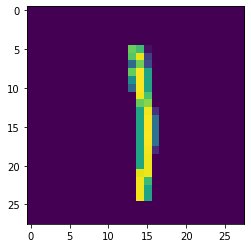

In [5]:
# random test
random_idx = np.random.randint(x_test.shape[0])
rx = x_test[random_idx] * 255
print(np.argmax(t_test[random_idx]))
rx = rx.reshape(28,28)
print(rx.shape)

from PIL import Image
from matplotlib.pyplot import imshow

imshow(Image.fromarray(np.uint8(rx)))

print(network.layers['Affine1'].W.shape)
rt_batch = np.array([x_test[random_idx]])
print(rt_batch.shape)
p = network.predict(rt_batch)
print(np.argmax(p, axis=1))